# **SME0104 - Cálculo Numérico - Avaliação Prática 1**

---
Amanda Caroline de Oliveira Pires - 12559090


### **1. Sistemas Lineares com Matrizes Simétricas**

**1)** Considere a matriz A e o vetor b dados abaixo:

Seja n=1000 a dimensão do problema

### **Solução:**

## **Bibliotecas e Funções**

In [82]:
import pandas as pd
import numpy as np
import math as m
from math import sqrt
import pprint
import scipy
import scipy.linalg   # SciPy Linear Algebra Library
from scipy.linalg import cholesky, cho_solve
import time
import matplotlib.pyplot as plt
from scipy.linalg import solve
from scipy.linalg import lu
from scipy.linalg import lu_solve, lu_factor
from scipy.optimize import fsolve
from scipy.linalg import lu_factor, lu_solve

**a)** Escreva um código que monte a matriz A para n = 1000.

In [72]:
# Construindo a matriz A

# o comando "fill_diagonal" preenche a diagonal de uma matriz com um valor especificado
def matriz_A(n):
    matriz = np.zeros((n,n))
    np.fill_diagonal(matriz, 100)
    np.fill_diagonal(matriz[1:], -4)
    np.fill_diagonal(matriz[:,1:], -4)
    np.fill_diagonal(matriz[2:], 1)
    np.fill_diagonal(matriz[:,2:], 1)
    return matriz

n = 1000
A = matriz_A(n)
print(A)

[[100.  -4.   1. ...   0.   0.   0.]
 [ -4. 100.  -4. ...   0.   0.   0.]
 [  1.  -4. 100. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 100.  -4.   1.]
 [  0.   0.   0. ...  -4. 100.  -4.]
 [  0.   0.   0. ...   1.  -4. 100.]]


In [73]:
# Montando o vetor b

b = np.full((n, 1), 1/n**4)
#display(b)


**b)** Escreva um código que faça a decomposição de Cholesky de uma matriz simétrica definida positiva qualquer.

Uma matriz **simétrica definida positiva** é uma matriz quadrada que:

- Possui elementos iguais em relação à diagonal principal;

- Todos os seus autovalores são positivos;

-  Os menores principais tem determinante positivo.

A **decomposição de Cholesky** 

Se a matriz A é definida positiva, podemos decompôla unicamente no produto HxH(transposta), no qual H é uma matriz triangular inferior com elementos positivos na diagonal.

In [74]:
def cholesky(M):
    n = np.shape(M)[0]

    H = np.zeros((n,n))

    for i in np.arange(n):
        for j in np.arange(i+1):
            tmp_sum = sum(H[i][k]*H[j][k] 
            for k in np.arange(j))           
            if (i == j):
                H[i][j] = sqrt(M[i][i] - tmp_sum)
            else:
                H[i][j] = ((M[i][j] - tmp_sum)/H[j][j])
    return H
 
M = [[6,2,1], [2,5,2], [1,2,6]] # Matriz A positiva definida qualquer

H = cholesky(M)

print(H)

[[2.44948974 0.         0.        ]
 [0.81649658 2.081666   0.        ]
 [0.40824829 0.80064077 2.27866358]]


**c)** Usando as rotinas implementadas anteriormente, escreva um código para resolver um sistema Ax = b.

In [75]:
# Decomposição Cholesky

def cholesky(A):
    n = np.shape(A)[0]
    L = np.zeros((n,n))
    for i in np.arange(n):
        for j in np.arange(i+1):
            tmp_sum = sum(L[i][k]*L[j][k] for k in np.arange(j))
            if (i == j):
                L[i][j] = np.sqrt(A[i][i] - tmp_sum)
            else:
                L[i][j] = ((A[i][j] - tmp_sum)/L[j][j])
    return L

# Resolvendo o sistema Ax = b

def cholesky_solve(A, b):
    L = cholesky(A)
    y = solve(L, b)
    x = solve(L.T, y)
    return x

x_cholesky = cholesky_solve(A, b)
 
print(x_cholesky)

[[1.03228419e-14]
 [1.07323449e-14]
 [1.06451885e-14]
 [1.06376292e-14]
 [1.06382023e-14]
 [1.06383008e-14]
 [1.06382989e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.063829

**d)** Escreva um código implementando o método de Jacobi para resolver um sistema Ax = b. Utilize o erro absoluto como critério de parada.

In [76]:
# Método de Jacobi

def jacobi(A,b,x0,tol,flag):
    n = np.shape(A)[0];
    D = np.diag(np.diag(A));
    aux_C = np.linalg.solve(D,A);
    C = np.eye(n) - aux_C;
    g = np.linalg.solve(D,b);
    kmax = 10000; k = 0;

    error = np.zeros(kmax);
    if flag:
        statment = (np.linalg.norm(b-A.dot(x0))>tol and k<kmax);
    else:
        statment = (k<kmax);

    while statment:
        error[k] = np.linalg.norm(b-A.dot(x0));
        k = k+1;
        x0 = C.dot(x0)+g;
        if flag:
            statment = (np.linalg.norm(b-A.dot(x0))>tol and k<kmax);
        else:
            statment = (k<kmax);
    
    if (k == kmax and flag):
        print('\nErro: o método não converge.\n')
    
    x = x0;
    return x,k,error

# Função Python
print('\nSolução Python:\n')
x_jacobi = np.linalg.solve(A,b);
print(x_jacobi);


Solução Python:

[[1.03228419e-14]
 [1.07323449e-14]
 [1.06451885e-14]
 [1.06376292e-14]
 [1.06382023e-14]
 [1.06383008e-14]
 [1.06382989e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.063829

**e)** Vamos comparar o método direto de Cholesky com o iterativo de Jacobi neste exemplo. Observe quanto tempo leva para resolver o sistema usando Cholesky. Quantas iterações foram necessárias no método de Jacobi para obtermos a mesma precisão da solução dada pelo método de Cholesky?

In [77]:
# Iterações Jacobi

n = 1000
x0 = np.zeros(n)
tol = 1e-18

print('\nSolução Gauss-Jacobi:\n')
(x_jacobi,k_jacobi,erro_jacobi) = jacobi(A,b,x0,tol,1)
print(x_jacobi);
print('%d iterações usadas' %(k_jacobi))


Solução Gauss-Jacobi:

[[1.03228419e-14 1.03228419e-14 1.03228419e-14 ... 1.03228419e-14
  1.03228419e-14 1.03228419e-14]
 [1.07323449e-14 1.07323449e-14 1.07323449e-14 ... 1.07323449e-14
  1.07323449e-14 1.07323449e-14]
 [1.06451885e-14 1.06451885e-14 1.06451885e-14 ... 1.06451885e-14
  1.06451885e-14 1.06451885e-14]
 ...
 [1.06451885e-14 1.06451885e-14 1.06451885e-14 ... 1.06451885e-14
  1.06451885e-14 1.06451885e-14]
 [1.07323449e-14 1.07323449e-14 1.07323449e-14 ... 1.07323449e-14
  1.07323449e-14 1.07323449e-14]
 [1.03228419e-14 1.03228419e-14 1.03228419e-14 ... 1.03228419e-14
  1.03228419e-14 1.03228419e-14]]
8 iterações usadas


In [78]:
# tempo decomposição Cholesky
inicio = time.time()

x0 = np.zeros_like(b)
x_cholesky = cholesky_solve(A, b)

fim = time.time()

tempo_total_cholesky = fim - inicio

print('Tempor total de execução: %.2f segundos' % tempo_total_cholesky)

Tempor total de execução: 160.02 segundos


In [79]:
# Calculando a precisão 

precision = np.linalg.norm(x_jacobi - x_cholesky, ord=np.inf)
print('Precisão =', precision)

# tempo Jacobi

inicio = time.time()

x0 = np.zeros_like(b)
x_jacobi = np.linalg.solve(A,b);

fim = time.time()

tempo_total_jacobi = fim - inicio

print('Tempor total de execução: %.2f segundos' % tempo_total_jacobi)


Precisão = 2.9422350285863435e-21
Tempor total de execução: 0.05 segundos


In [80]:
# precisão da solução de Jacobi em relação a Cholesky

precision  = np.linalg.norm(x_jacobi - x_cholesky, ord = np.inf)

print('Tempo de execução Cholesky: %.2f segundos' % tempo_total_cholesky)
print('Tempor de execução Jacobi: %2.f segundos' % tempo_total_jacobi)
print('Precisão da solução de Jacobi em relação à Cholesky: %2.f' % precision)
print('Numéro de iterações do método de Jacobi: %d' % k_jacobi)

Tempo de execução Cholesky: 160.02 segundos
Tempor de execução Jacobi:  0 segundos
Precisão da solução de Jacobi em relação à Cholesky:  0
Numéro de iterações do método de Jacobi: 8


**f)** É possível melhorar a implementação da decomposição de Cholesky para o exemplo em questão ? 


Usando a função cholesky da biblioteca SciPy. Essa função é uma implementação eficiente da decomposição de Cholesky que usa algoritmos otimizados e é escrita em linguagens de baixo nível para obter o máximo desempenho. Exemplo:


In [83]:
# Decompondo em LU

L = scipy.linalg.cholesky(A, lower=True)
U = scipy.linalg.cholesky(A, lower=False)

# Resolver o sistema Ax = b

# Calcular a decomposição de Cholesky de A
L = cholesky(A, lower=True)

# Resolver o sistema linear usando a decomposição de Cholesky
x_cholesky = cho_solve((L, True), b)

print(x_cholesky)

[[1.03228419e-14]
 [1.07323449e-14]
 [1.06451885e-14]
 [1.06376292e-14]
 [1.06382023e-14]
 [1.06383008e-14]
 [1.06382989e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.063829

Além disso, A decomposição **LU banda** é uma técnica que pode ser usada para resolver sistemas lineares de equações em matrizes de banda. Isso pode melhorar a eficiência computacional em comparação com a decomposição LU padrão, pois leva em consideração a estrutura de banda da matriz e reduz o número de operações necessárias.
Uma matriz de banda é uma matriz esparsa na qual todos os elementos fora de uma faixa diagonal são iguais a zero.

Exemplo: 

In [84]:
#LU banda

import numpy as np
import time

def LU( A ):
    
    n = A.shape[ 0 ]
    
    U = A.copy()
    L = np.eye( n )
    
    for j in range( n - 1 ):
        
        for i in range( j + 1, n ):
                
            L[ i, j ] = U[ i, j ] / U[ j, j ]
            U[ i, j : n ] = U[ i, j : n ] - L[ i, j ] * U[ j, j : n ]
            
    return ( L, U )


def LU_banda( A, p ):
    
    n = A.shape[ 0 ]
    
    U = A.copy()
    L = np.eye( n )
    
    for j in range( n - 1 ):
        
        v = min( n, j + p + 1 )
        for i in range( j + 1, v ):
                
            L[ i, j ] = U[ i, j ] / U[ j, j ]
            U[ i, j : v ] = U[ i, j : v ] - L[ i, j ] * U[ j, j : v ]
            
    return ( L, U )


n = 1000
p = 2 #  largura de banda da matriz A

A = np.zeros( ( n, n ) )
for i in range( n ):
    for j in range( max( 0, i - p ), min( n, i + p + 1 ) ):
        A[ i, j ] = np.random.normal()    


start_time = time.time()
( L, U ) = LU( A )
end_time = time.time()
print('Tempo de execução em segundos decomposição LU:', end_time - start_time )


start_time = time.time()
( L_banda, U_banda ) = LU_banda( A, p )
end_time = time.time()

tempo_cholesky_banda = end_time - start_time
print( "Tempo de execução em segundos Cholesky com matriz de banda:", tempo_cholesky_banda)


print("Solução decomposição LU:", np.linalg.norm( L @ U - A ) )
print("Solução Cholesky com matriz de banda:", np.linalg.norm( L_banda @ U_banda - A ) )

Tempo de execução em segundos decomposição LU: 3.0546836853027344
Tempo de execução em segundos Cholesky com matriz de banda: 0.01562786102294922
Solução decomposição LU: 4.554412203423658e-13
Solução Cholesky com matriz de banda: 4.554412203423658e-13


Pode-se perceber que o tempo de execução do método de Cholesky com a matriz de banda é menor do que a decomposição LU.

## **2. Método de Newton Para Sistemas Não-Lineares**

**1)** Observando a equação (4), vê-se a necessidade de calcular a matriz inversa da Jacobiana.É possível calcular matrizes inversas usando a decomposição LU, sendo assim, implemente um código que:

**a)** Calcule a fatoração LU de uma matriz qualquer

In [85]:
# Fatoração LU

def LU_decomposition(A):
    P, L, U = lu(A)
    return P, L, U

# Testando a função com uma matriz de exemplo
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 10]])
P, L, U = LU_decomposition(A)

print('Matriz A:')
print(A)

print('Matriz P:')
print(P)

print('Matriz L:')
print(L)

print('Matriz U:')
print(U)


Matriz A:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
Matriz P:
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
Matriz L:
[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]
Matriz U:
[[ 7.          8.         10.        ]
 [ 0.          0.85714286  1.57142857]
 [ 0.          0.         -0.5       ]]


**b)** Resolva um sistema linear cujo lado direito é uma matriz

In [86]:
# Resolvendo sistema linear 

def solve_linear_system(A, B):
    LU, piv = lu_factor(A)
    X = lu_solve((LU, piv), B)
    return X

# Testando a função com um sistema linear de exemplo

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 10]])      # matriz A qualquer
B = np.array([[1, 4], [2, 5], [3, 6]])                # matriz b qualquer
X = solve_linear_system(A, B)

print('Matriz A:')
print(A)

print('Matriz B:')
print(B)

print('Solução X do sistema linear Ax = B:')
print(X)


Matriz A:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
Matriz B:
[[1 4]
 [2 5]
 [3 6]]
Solução X do sistema linear Ax = B:
[[-3.33333333e-01 -3.33333333e+00]
 [ 6.66666667e-01  3.66666667e+00]
 [-0.00000000e+00  1.77635684e-15]]


**c)** Finalmente, calcule a inversa de uma matriz qualquer resolvendo vários sistemas lineares

In [87]:
# Implementando a matriz inversa

def matrix_inverse(A):
    n = A.shape[0]
    I = np.eye(n)
    A_inv = np.zeros((n, n))
    LU, piv = lu_factor(A)
    for i in range(n):
        b = I[:, i]
        x = lu_solve((LU, piv), b)
        A_inv[:, i] = x
    return A_inv

# Testando a função com uma matriz de exemplo

A = np.array([[2, -1], [4, 5]])
A_inv = matrix_inverse(A)

print('Matriz A:')
print(A)

print('Inversa de A:')
print(A_inv)

print('Produto de A e sua inversa:')
print(np.dot(A, A_inv))


Matriz A:
[[ 2 -1]
 [ 4  5]]
Inversa de A:
[[ 0.35714286  0.07142857]
 [-0.28571429  0.14285714]]
Produto de A e sua inversa:
[[ 1.00000000e+00  5.55111512e-17]
 [-1.11022302e-16  1.00000000e+00]]


**2)** Implemente o método de Newton para sistemas usando a rotina implementada no item anterior. Lembre-se de especificar o critério de parada utilizado.


In [97]:
# Método de Newton para sistemas lineares com a matriz inversa

def F1(x, y):
    return x**2 + y**2 - 1

def F2(x, y):
    return x - y

def jacobian(x, y):
    return np.array([[2*x, 2*y], [1, -1]])

def newton_system(F1, F2, x0, y0, A_inv, tol=1e-6, max_iter=100):
    x = np.array([x0, y0], dtype=float)
    
    for i in range(max_iter):
        F = np.array([F1(x[0], x[1]), F2(x[0], x[1])])
        J = jacobian(x[0], x[1])
        
        if np.linalg.norm(F) < tol:
            print("Convergiu em", i, "iterações")
            return x
        
        delta = A_inv @ np.linalg.solve(J, -F)
        x += delta
        
    print("Não convergiu dentro", max_iter, "iterações")
    return None

# Exemplo de uso
x0 = 1.0
y0 = 1.0
tol = 1e-6
soluçao = newton_system(F1, F2, x0, y0, A_inv)
if soluçao is not None:
  print("Solução:", soluçao)


Convergiu em 51 iterações
Solução: [0.70710728 0.70710642]


**3)** Implemente novamente o método de Newton para sistemas usando o algoritmo anterior. Utilize as rotinas já implementadas neste trabalho para resolução do sistema linear, indicando sempre qual está usando.

In [89]:
# Método de Newton para sistemas lineares com decomposição LU 

start_time = time.time()


def F1(x, y):
    return x**2 + y**2 - 1

def F2(x, y):
    return x - y

def jacobian(x, y):
    return np.array([[2*x, 2*y], [1, -1]])

def newton_system(F1, F2, x0, y0, tol=1e-6, max_iter=100):
    x = np.array([x0, y0], dtype=float)
    
    for i in range(max_iter):
        F = np.array([F1(x[0], x[1]), F2(x[0], x[1])])
        J = jacobian(x[0], x[1])
        
        if np.linalg.norm(F) < tol:
            print("Convergiu em", i, "iterações")
            return x
        
        # Decomposição LU da matriz Jacobiana
        lu, piv = lu_factor(J)
        
        # Resolver o sistema linear usando a decomposição LU
        delta = lu_solve((lu, piv), -F)
        x += delta
        
    print("Não convergiu dentro", max_iter, "iterações")
    return None

# Exemplo de uso
x0 = 1.0
y0 = 1.0
soluçao = newton_system(F1, F2, x0, y0)
if soluçao is not None:
    print("Solução:", soluçao)

end_time = time.time()
execution_time_NLU3 = end_time - start_time

print(f"Tempo de execução: {execution_time_NLU3} segundos")


Convergiu em 4 iterações
Solução: [0.70710678 0.70710678]
Tempo de execução: 0.0017023086547851562 segundos


O método de Newton com a decomposição LU, converge bem mais rápido do que o método de Newton utilizando a matriz inversa.

**4)** Dada a equação de um círculo (x − a)^2 + (y − b)^2 = R^2 e três pontos que passam por esse círculo

**a)** Monte um sistema não-linear para determinar a, b e R

In [98]:
# Definindo a função que representa o sistema não-linear

def F(x):
    a, b, R = x
    x1, x2, x3 = 8.21, 0.34, 5.96
    y1, y2, y3 = 0.00, 6.62, -1.12
    return [
        (x1 - a)**2 + (y1 - b)**2 - R**2,
        (x2 - a)**2 + (y2 - b)**2 - R**2,
        (x3 - a)**2 + (y3 - b)**2 - R**2
    ]

# Palpite inicial para a solução
x0 = [1, 1, 1]

# Resolvendo o sistema não-linear usando fsolve
sol = fsolve(F, x0)

# Extraindo os valores de a, b e R da solução
a, b, R = sol

print(f'a = {a:.6f}')
print(f'b = {b:.6f}')
print(f'R = {R:.6f}')


a = 4.830106
b = 3.969922
R = 5.213824


**b)** Resolva o sistema não-linear utilizando os códigos feitos nos itens 2 e 3.


**Método de Newton com a matriz inversa para um sistema não-linear**

In [92]:
# Método de Newton com a matriz inversa para um sistema não-linear

def F(x):
    a, b, R = x
    x1, x2, x3 = 8.21, 0.34, 5.96
    y1, y2, y3 = 0.00, 6.62, -1.12
    return [
        (x1 - a)**2 + (y1 - b)**2 - R**2,
        (x2 - a)**2 + (y2 - b)**2 - R**2,
        (x3 - a)**2 + (y3 - b)**2 - R**2
    ]


def jacobian(x):
    a, b, R = x
    return np.array([
        [-2*(x[0]-8.21), -2*(x[1]-0.00), -2*(x[2]-5.96)],
        [-2*(x[0]-0.34), -2*(x[1]-6.62), -2*(x[2]-5.96)],
        [-2*(x[0]-5.96), -2*(x[1]+1.12), -2*(x[2]-5.96)]
    ])

def newton_system(F, x0, A_inv, tol=1e-6, max_iter=100):
    x = np.array(x0, dtype=float)

    for i in range(max_iter):
        F_val = F(x)
        if np.linalg.norm(F_val) < tol:
            print("Convergiu em", i, "iterações")
            return x

        delta = A_inv @ F_val
        x -= delta

    print("Não convergiu dentro", max_iter, "iterações")
    return None

# Palpite inicial para a solução
x0 = [1, 1, 1]

# Resolvendo o sistema não-linear usando o método de Newton com matriz inversa
solution = newton_system(F, x0, np.linalg.inv(jacobian(x0)))
if solution is not None:
    a, b, R = solution
    print(f'a = {a:.6f}')
    print(f'b = {b:.6f}')
    print(f'R = {R:.6f}')


Não convergiu dentro 100 iterações


<ipython-input-92-e90011ea9b41>:8: RuntimeWarning: overflow encountered in double_scalars
  (x1 - a)**2 + (y1 - b)**2 - R**2,
<ipython-input-92-e90011ea9b41>:8: RuntimeWarning: invalid value encountered in double_scalars
  (x1 - a)**2 + (y1 - b)**2 - R**2,
<ipython-input-92-e90011ea9b41>:9: RuntimeWarning: overflow encountered in double_scalars
  (x2 - a)**2 + (y2 - b)**2 - R**2,
<ipython-input-92-e90011ea9b41>:9: RuntimeWarning: invalid value encountered in double_scalars
  (x2 - a)**2 + (y2 - b)**2 - R**2,
<ipython-input-92-e90011ea9b41>:10: RuntimeWarning: overflow encountered in double_scalars
  (x3 - a)**2 + (y3 - b)**2 - R**2
<ipython-input-92-e90011ea9b41>:10: RuntimeWarning: invalid value encountered in double_scalars
  (x3 - a)**2 + (y3 - b)**2 - R**2


Observa-se que não houve convergência, assim, utilizar a matriz inversa não nos garante que haverá convergência em todos os casos de sistemas não-lineares. Alguns motivos pra que isso ocorra são: 

- Escolha inadequada do ponto inicial;

- Singularidade da matriz jacobiana, significa que não possui uma inversa. Nesses casos, não é possível utilizar a matriz inversa no método de Newton e outras abordagens devem ser consideradas;

- Má condição numérica: se a matriz jacobiana for mal condicionada, ou seja, se os seus valores próprios forem muito pequenos em relação ao valor absoluto dos elementos da matriz, a solução pode ser sensível a pequenas perturbações numéricas e o método pode não convergir;

- Pontos críticos: se o sistema não-linear tiver pontos críticos onde a matriz jacobiana tem autovalores iguais a zero, o método de Newton pode ficar preso nessas regiões e não convergir;

- Comportamento oscilatório: Em alguns casos, o método de Newton pode apresentar um comportamento oscilatório, alternando entre direções opostas, sem se aproximar da solução.

**Método de Newton com decomposição LU para um sistema não-linear**

In [93]:
start_time_4 = time.time()

def F(x):
    a, b, R = x
    x1, x2, x3 = 8.21, 0.34, 5.96
    y1, y2, y3 = 0.00, 6.62, -1.12
    return [
        (x1 - a)**2 + (y1 - b)**2 - R**2,
        (x2 - a)**2 + (y2 - b)**2 - R**2,
        (x3 - a)**2 + (y3 - b)**2 - R**2
    ]

def jacobian(x):
    a, b, R = x
    x1, x2, x3 = 8.21, 0.34, 5.96
    y1, y2, y3 = 0.00, 6.62, -1.12
    return np.array([
        [-2*(x1 - a), -2*(y1 - b), -2*R],
        [-2*(x2 - a), -2*(y2 - b), -2*R],
        [-2*(x3 - a), -2*(y3 - b), -2*R]
    ])

def newton_system(F, x0, tol=1e-6, max_iter=100):
    x = np.array(x0, dtype=float)
    
    for i in range(max_iter):
        F_val = np.array(F(x))
        J = jacobian(x)
        
        if np.linalg.norm(F_val) < tol:
            print("Convergiu em", i, "iterações")
            return x
        
        LU = lu_factor(J)
        delta = lu_solve(LU, -F_val)
        x += delta
        
    print("Não convergiu dentro", max_iter, "iterações")
    return None

# Palpite inicial para a solução
x0 = [1, 1, 1]

# Resolvendo o sistema não-linear usando o método de Newton

solução = newton_system(F, x0)
if solução is not None:
    a, b, R = solução
    print(f'a = {a:.6f}')
    print(f'b = {b:.6f}')
    print(f'R = {R:.6f}')
end_time_4 = time.time()
execution_time_4 = end_time_4 - start_time_4
print(f"Tempo de execução: {execution_time_4} segundos")

Convergiu em 6 iterações
a = 4.830106
b = 3.969922
R = 5.213824
Tempo de execução: 0.006633281707763672 segundos


**c)** Houve melhora no tempo de execução do código implementado no item 3?

In [94]:
print('Tempo de execução na equação linear =', execution_time_NLU3)
print('Tempo de execução na equação não-linear =', execution_time_4)

Tempo de execução na equação linear = 0.0017023086547851562
Tempo de execução na equação não-linear = 0.006633281707763672


Não houve melhora para o sistema linear, o tempo de execução na **3)** foi menor do que o tempo de execução do sistema **não-linear**.

**d)** Finalmente, com os resultados a, b e R, utilizando a equação do círculo dada por **(x-a)^2 + (y-b)^2 = R^2**, imprima o gráfico que representa esse círculo

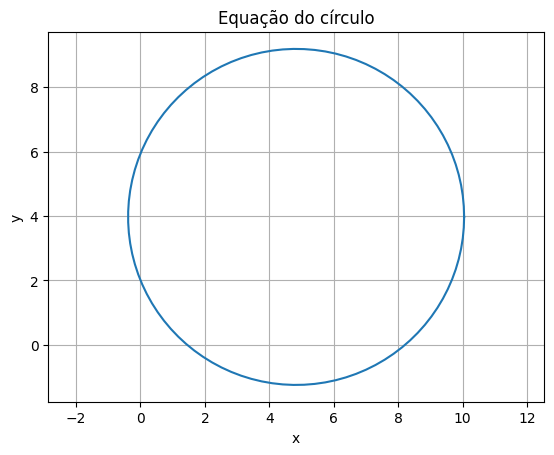

In [96]:
# Plota o gráfico da equação do círculo do problema em questão

a = 4.830106
b = 3.969922
R = 5.213824

theta = np.linspace(0, 2*np.pi, 100)
x = a + R * np.cos(theta)
y = b + R * np.sin(theta)

plt.plot(x, y)
plt.axis('equal') # garante que os eixos x e y tenham a mesma escala
plt.grid(True)
plt.title('Equação do círculo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
